# 灰度腐蚀与膨胀

图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，主要用来寻找图像中的极大区域和极小区域。已知有如下的灰度图像A和结构元素B

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## 灰度腐蚀

计算进行腐蚀运算后的图像

$$
(f\ominus b)(s,t)=min \{
    f(s+x,t+y)-b(x,y)|
    (s+x,t+y)\in D_f;(x,y)\in D_b\}
$$

In [19]:
def erose(A,B,center):
    result=A.copy()
    for i in range(center[0],A.shape[0]-(B.shape[0]-center[0])+1):
        for j in range(center[1],A.shape[1]-(B.shape[1]-center[1])+1):
            i1=i-center[0];i2=i-center[0]+B.shape[0]
            j1=j-center[1];j2=j-center[1]+B.shape[1]
            r=A[i1:i2,j1:j2]-B
            result[i,j]=r.min()
    return result

## 灰度膨胀

计算进行膨胀运算后的图像

$$
(f\oplus b)(s,t)=max \{
    f(s-x,t-y)+b(x,y)|
    (s-x,t-y)\in D_f;(x,y)\in D_b\}
$$

In [20]:
def dilate(A,B,center):
    result=A.copy()
    for i in range(center[0],A.shape[0]-(B.shape[0]-center[0])+1):
        for j in range(center[1],A.shape[1]-(B.shape[1]-center[1])+1):
            i1=i-center[0];i2=i-center[0]+B.shape[0]
            j1=j-center[1];j2=j-center[1]+B.shape[1]
            r=A[i1:i2,j1:j2]+B
            result[i,j]=r.max()
    return result

## P103习题12

In [21]:
#定义待处理的灰度图像A
data=[]
A=list(range(1,7))
for i in range(6):
    data.append(A.copy())
    A.insert(len(A),A[0])
    A.remove(A[0])
A=np.array(data,dtype='int')
#定义结构元素B
B=np.array([[0,1,0],[1,2,1],[0,1,0]],dtype=int)
print("A=\n",A,"\nB=\n",B)

A=
 [[1 2 3 4 5 6]
 [2 3 4 5 6 1]
 [3 4 5 6 1 2]
 [4 5 6 1 2 3]
 [5 6 1 2 3 4]
 [6 1 2 3 4 5]] 
B=
 [[0 1 0]
 [1 2 1]
 [0 1 0]]


In [22]:
A_Erosed=erose(A,B,(1,1))
A_Dilated=dilate(A,B,(1,1)).astype(int)
print("灰度腐蚀之后的图像为：\n",A_Erosed,"\n灰度膨胀之后的图像为：\n",A_Dilated)

灰度腐蚀之后的图像为：
 [[ 1  2  3  4  5  6]
 [ 2  1  2  1  0  1]
 [ 3  2  1  0 -1  2]
 [ 4  1  0 -1  0  3]
 [ 5  0 -1  0  1  4]
 [ 6  1  2  3  4  5]] 
灰度膨胀之后的图像为：
 [[1 2 3 4 5 6]
 [2 5 6 7 8 1]
 [3 6 7 8 7 2]
 [4 7 8 7 6 3]
 [5 8 7 6 5 4]
 [6 1 2 3 4 5]]


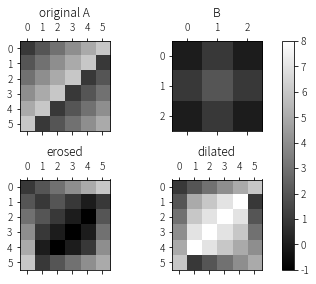

In [23]:
fig,axes=plt.subplots(2,2)
im=axes[0,0].matshow(A, cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[0,0].title.set_text('original A')
im=axes[0,1].matshow(B, cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[0,1].title.set_text('B')
im=axes[1,0].matshow(A_Erosed, cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[1,0].title.set_text('erosed')
im=axes[1,1].matshow(A_Dilated,cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[1,1].title.set_text('dilated')
fig.tight_layout() 
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

## 使用图片演示效果

In [24]:
pic=plt.imread('coins.png')
center=(3,3)
kernel=np.zeros((7,7))
for i in range(7):
    kernel[i,3]=0.4;kernel[3,i]=0.3
e=erose(pic,kernel,center)
ed=dilate(e,kernel,center)
d=dilate(pic,kernel,center)
de=erose(d,kernel,center)

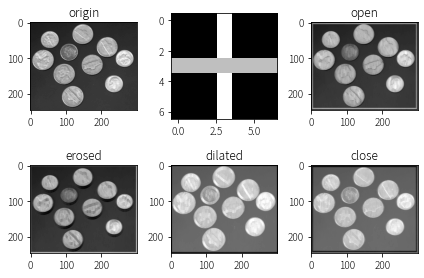

In [26]:
fig=plt.figure()
row=2;col=3
plt.subplot(row,col,1)
plt.imshow(pic,cmap = plt.cm.gray)
plt.title('origin')
plt.subplot(row,col,2)
plt.imshow(kernel,cmap = plt.cm.gray)
plt.subplot(row,col,4)
plt.imshow(e,cmap = plt.cm.gray)
plt.title('erosed')
plt.subplot(row,col,5)
plt.imshow(d,cmap = plt.cm.gray)
plt.title('dilated')
plt.subplot(row,col,3)
plt.imshow(ed,cmap = plt.cm.gray)
plt.title('open')
plt.subplot(row,col,6)
plt.imshow(de,cmap = plt.cm.gray)
plt.title('close')
fig.tight_layout() 
plt.show()